In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
titanic_dt = pd.read_csv('E:\\Machine-Learning\\Dataset\\titanic.csv')
titanic_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

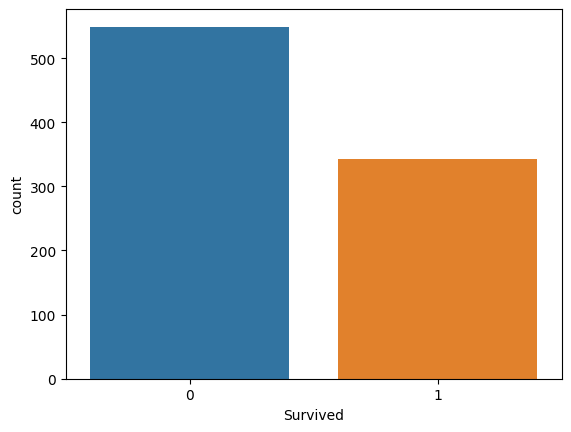

In [5]:
sns.countplot(x='Survived',data=titanic_dt)

In [6]:
titanic_dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

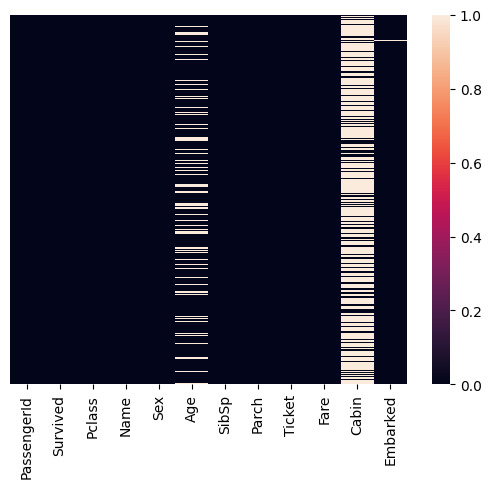

In [7]:
sns.heatmap(titanic_dt.isnull(),yticklabels=False)

In [8]:
titanic_dt.drop("Cabin",axis=1,inplace=True)

In [9]:
titanic_dt['Age'].mean()

titanic_dt = titanic_dt.fillna({'Age' : titanic_dt['Age'].mean()})

In [10]:
titanic_dt.dropna(inplace=True)

In [11]:
titanic_dt.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

In [12]:
columns = ['PassengerId','Name','Ticket', 'Fare', 'Embarked']
data = titanic_dt.drop(columns,axis=1)

In [13]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0


In [14]:
data['Sex'] = data['Sex'].map({'female' : 1 , 'male' : 0}).astype(int)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [16]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

trainx, testx, trainy, testy = train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(trainx, trainy)

LogisticRegression()

In [19]:
predict_y = logistic_model.predict(testx)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [21]:
confusion_matrix(testy,predict_y)

array([[88, 21],
       [16, 53]], dtype=int64)

In [22]:
print(precision_score(testy,predict_y))
print(recall_score(testy,predict_y))
print(f1_score(testy,predict_y))

0.7162162162162162
0.7681159420289855
0.7412587412587412


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
tuned_parameters = [{'C' : [10**-4,10**-2,10**0,10**2,10**4]}]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.8)

In [25]:
model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}])

In [26]:
print(model.best_estimator_)
print(model.score(x_test, y_test))

LogisticRegression(C=1)
0.8146067415730337


In [27]:
print("X_train.shape: ", x_train.shape)
print("X_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (177, 5)
X_test.shape:  (712, 5)
y_train.shape:  (177,)
y_test.shape:  (712,)


In [43]:
model.best_estimator_

{'C': 1}